## 1、拉格朗日插值

In [79]:
# 1、对给定的(x, y)数据data计算拉格朗日插值

from matplotlib import pyplot as plt

def Lg(data, testdata):
    predict = 0
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    
    if testdata in data_x:
        return data_y[data_x.index(testdata)]
    
    for i in range(len(data_x)):
        af = 1.0
        for j in range(len(data_x)):
            if j != i:
                af *= (testdata - data_x[j]) / (data_x[i] - data_x[j])  # 基函数计算
        predict += data_y[i] * af  # 正确位置：在内层循环外累加
    return predict

# 2、定义画曲线图的函数

def plot(data, nums):
    data_x = [data[i][0] for i in range(len(data))]  # 修正索引错误：[data[i][0]
    data_y = [data[i][1] for i in range(len(data))]
    Area = [min(data_x), max(data_x)]  # 确定绘图范围
    
    # 生成均匀分布的 X 序列
    X = [Area[0] + 1.0 * i * (Area[1] - Area[0]) / nums for i in range(nums)]
    X[-1] = Area[1]  # 确保最后一个点精确等于最大值
    
    Y = [Lg(data, x) for x in X]  # 计算插值结果
    
    # 绘制曲线和散点
    plt.plot(X, Y, label='Interpolation Curve')
    plt.scatter(data_x, data_y, color='red', label='Data Points')  # 用 scatter 替代循环
    
    # 保存和显示图像
    plt.legend()
    plt.savefig('Lg.jpg')
    plt.show()


物体1在 x = -3.75 处的 y 值: -0.3856
物体1在 x = 0.25 处的 y 值: 0.2300


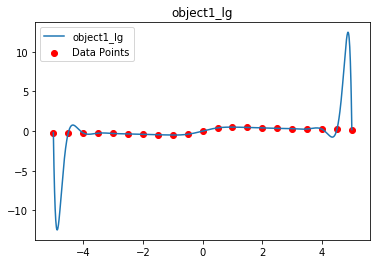

物体2在 x = -3.75 处的 y 值: -15.0674
物体2在 x = 0.25 处的 y 值: 0.6564


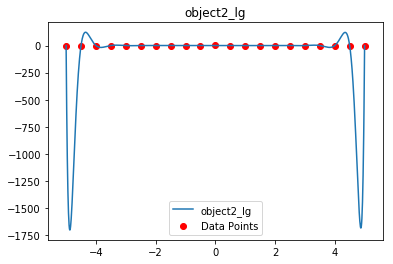

In [80]:
from matplotlib import pyplot as plt

def Lg(data, testdata):
    predict = 0
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    
    # 检查重复 x 值
    if len(data_x) != len(set(data_x)):
        raise ValueError("数据中存在重复的 x 值，请确保所有 x 唯一！")
    
    if testdata in data_x:
        return data_y[data_x.index(testdata)]
    
    for i in range(len(data_x)):
        af = 1.0
        for j in range(len(data_x)):
            if j != i:
                af *= (testdata - data_x[j]) / (data_x[i] - data_x[j])
        predict += data_y[i] * af
    return predict

def plot(data, nums, title='Interpolation Curve', filename='Lg.jpg'):
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    Area = [min(data_x), max(data_x)]
    
    X = [Area[0] + 1.0 * i * (Area[1] - Area[0]) / nums for i in range(nums)]
    X[-1] = Area[1]
    
    Y = [Lg(data, x) for x in X]
    
    plt.figure()
    plt.plot(X, Y, label=title)
    plt.scatter(data_x, data_y, color='red', label='Data Points')
    plt.legend()
    plt.title(title)
    plt.savefig(filename)
    plt.show()

# 物体1的数据
data_1 = [
    (-5.0, -0.1923), (-4.5, -0.2118), (-4.0, -0.2353), (-3.5, -0.2642), (-3.0, -0.3), 
    (-2.5, -0.3448), (-2.0, -0.4000), (-1.5, -0.4615), (-1.0, -0.5000), (-0.5, -0.4000),
    (0, 0), (0.5, 0.4000), (1.0, 0.5000), (1.5, 0.4615), (2.0, 0.4000), 
    (2.5, 0.3448), (3.0, 0.3000), (3.5, 0.2642), (4.0, 0.2353), (4.5, 0.2118), (5.0, 0.1923)
]

# 物体2的数据
data_2 = [
    (-5.0, 0.0016), (-4.5, 0.0025), (-4.0, 0.0033), (-3.5, 0.0044), (-3.0, 0.0064), 
    (-2.5, 0.0099), (-2.0, 0.0175), (-1.5, 0.0385), (-1.0, 0.1379), (-0.5, 0.1379),
    (0, 1.0000), (0.5, 0.0385), (1.0, 0.0175), (1.5, 0.0099), (2.0, 0.0064), 
    (2.5, 0.0044), (3.0, 0.0033), (3.5, 0.0025), (4.0, 0.0020), (4.5, 0.0016), (5.0, 0.0016)
]

# 对物体1进行插值计算
x1 = -3.75
x2 = 0.25
y1_1 = Lg(data_1, x1)
y1_2 = Lg(data_1, x2)
print(f"物体1在 x = {x1} 处的 y 值: {y1_1:.4f}")
print(f"物体1在 x = {x2} 处的 y 值: {y1_2:.4f}")

# 绘制物体1的插值曲线
plot(data_1, 1000, title='object1_lg', filename='Lg1.jpg')

# 对物体2进行插值计算
y2_1 = Lg(data_2, x1)
y2_2 = Lg(data_2, x2)
print(f"物体2在 x = {x1} 处的 y 值: {y2_1:.4f}")
print(f"物体2在 x = {x2} 处的 y 值: {y2_2:.4f}")

# 绘制物体2的插值曲线
plot(data_2, 1000, title='object2_lg', filename='Lg2.jpg')

## 2、牛顿插值

In [81]:
from matplotlib import pyplot as plt
# 对给定的(x, y)数据data计算差商
def calF(data):
    # 差商计算 n 个数据 0-(n-1) 阶差商
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    F=[1 for i in range(len(data))]
    FM = []  # 存储每一阶的差商

    for i in range(len(data)):
        FME = []
        if i == 0:
            FME = data_y
        else:
            for j in range(len(FM[len(FM)-1]) - 1):
                delta = data_x[i + j] - data_x[j]
                value = 1.0*(FM[len(FM)-1][j+1] - FM[len(FM)-1][j])/delta
                FME.append(value)
        FM.append(FME)

    F = [fme[0] for fme in FM]
    print(FM)
    return F


def NT(data, testdata, F):
    # 牛顿插值多项式计算
    predict = 0
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    if testdata in data_x:
        return data_y[data_x.index(testdata)]
    else:
        for i in range(len(data_x)):
            Eq = 1
            if i != 0:
                for j in range(i):
                    Eq *= (testdata - data_x[j])
            predict += F[i] * Eq
        return predict
    
    

def plot(data, nums):
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    
    Area = [min(data_x), max(data_x)]
    
    X = [Area[0] + 1.0 * i * (Area[1] - Area[0]) / nums for i in range(nums)]
    X[len(X)-1] = Area[1]
    Y = [Divideline(data,x) for x in X]  # 牛顿插值

    plt.plot(X, Y, label='result')
    for i in range(len(data_x)):
        plt.plot(data_x[i],data_y[i],'ro',label = "point")
    plt.savefig('Divline.jpg')
    plot(data,100)


===== 物体1插值结果 =====
x = -3.75 	 y = -0.3856
x = 0.25 	 y = 0.2300


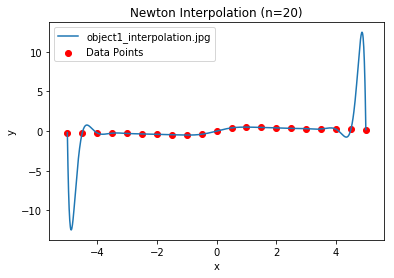


===== 物体2插值结果 =====
x = -3.75 	 y = -15.067373
x = 0.25 	 y = 0.656353


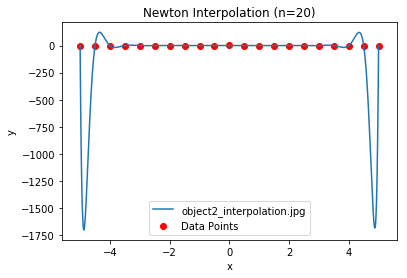

In [82]:
from matplotlib import pyplot as plt

def calF(data):
    """计算差商系数"""
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    
    # 检查重复x值
    if len(data_x) != len(set(data_x)):
        raise ValueError("数据中存在重复的x值！")
    
    FM = []
    for i in range(len(data)):
        if i == 0:
            FM.append(data_y.copy())  # 第0阶差商为原始y值
        else:
            current_FM = []
            for j in range(len(FM[i-1]) - 1):
                delta_x = data_x[j+i] - data_x[j]
                delta_f = FM[i-1][j+1] - FM[i-1][j]
                current_FM.append(delta_f / delta_x)
            FM.append(current_FM)
    return [fm[0] for fm in FM]  # 返回各阶第一个差商

def NT(data, testdata, F):
    """牛顿插值计算"""
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    
    if testdata in data_x:
        return data_y[data_x.index(testdata)]
    
    predict = 0.0
    for i in range(len(F)):
        term = F[i]
        for j in range(i):
            term *= (testdata - data_x[j])
        predict += term
    return predict

def plot(data, nums, filename):
    """绘制插值曲线"""
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    
    Area = [min(data_x), max(data_x)]
    X = [Area[0] + (Area[1]-Area[0])*i/nums for i in range(nums)]
    X[-1] = Area[1]  # 确保最后一个点精确
    
    try:
        F = calF(data)  # 计算差商系数
        Y = [NT(data, x, F) for x in X]
        
        plt.figure()
        plt.plot(X, Y, label= filename)
        plt.scatter(data_x, data_y, color='red', label='Data Points')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title(f'Newton Interpolation (n={len(data)-1})')
        plt.savefig(filename)
        plt.show()
    except ValueError as e:
        print(f"绘图失败: {e}")

if __name__ == "__main__":
    # 物体1的数据
    data_1 = [
        (-5.0, -0.1923), (-4.5, -0.2118), (-4.0, -0.2353), (-3.5, -0.2642), (-3.0, -0.3), 
        (-2.5, -0.3448), (-2.0, -0.4000), (-1.5, -0.4615), (-1.0, -0.5000), (-0.5, -0.4000),
        (0, 0), (0.5, 0.4000), (1.0, 0.5000), (1.5, 0.4615), (2.0, 0.4000), 
        (2.5, 0.3448), (3.0, 0.3000), (3.5, 0.2642), (4.0, 0.2353), (4.5, 0.2118), (5.0, 0.1923)
    ]

    # 物体2的数据
    data_2 = [
        (-5.0, 0.0016), (-4.5, 0.0025), (-4.0, 0.0033), (-3.5, 0.0044), (-3.0, 0.0064), 
        (-2.5, 0.0099), (-2.0, 0.0175), (-1.5, 0.0385), (-1.0, 0.1379), (-0.5, 0.1379),
        (0, 1.0000), (0.5, 0.0385), (1.0, 0.0175), (1.5, 0.0099), (2.0, 0.0064), 
        (2.5, 0.0044), (3.0, 0.0033), (3.5, 0.0025), (4.0, 0.0020), (4.5, 0.0016), (5.0, 0.0016)
    ]

    # 对物体1进行计算
    try:
        F_1 = calF(data_1)
        x_targets = [-3.75, 0.25]
        print("===== 物体1插值结果 =====")
        for x in x_targets:
            y = NT(data_1, x, F_1)
            print(f"x = {x:.2f} \t y = {y:.4f}")
        plot(data_1, 1000, 'object1_interpolation.jpg')  # 生成物体1的插值图
    except ValueError as e:
        print(f"物体1计算失败: {e}")

    # 对物体2进行计算
    try:
        F_2 = calF(data_2)
        print("\n===== 物体2插值结果 =====")
        for x in x_targets:
            y = NT(data_2, x, F_2)
            print(f"x = {x:.2f} \t y = {y:.6f}")
        plot(data_2, 1000, 'object2_interpolation.jpg')  # 生成物体2的插值图
    except ValueError as e:
        print(f"物体2计算失败: {e}")

## 3、分段线性插值

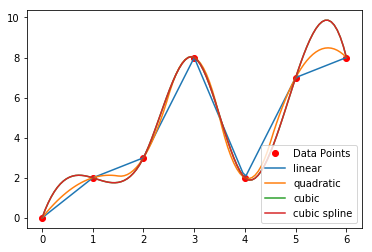

In [83]:
import numpy as np
from scipy import interpolate
import pylab as pl

from matplotlib import pyplot as plt

# 找出预测点所在的分段，计算插值函数和估计值

def DivideLine(data, testdata):
    # 分段线性插值
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    if testdata in data_x:
        return data_y[data_x.index(testdata)]
    else:
        index = 0
        for j in range(len(data_x) - 1):
            if data_x[j] < testdata < data_x[j + 1]:
                index = j
                break
        # 线性插值公式
        predict = (testdata - data_x[index]) * (data_y[index + 1] - data_y[index]) / (data_x[index + 1] - data_x[index]) + data_y[index]
        return predict
    
    
# 画图

def plot(data, nums):
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    
    Area = [min(data_x), max(data_x)]
    
    X = [Area[0] + 1.0 * i * (Area[1] - Area[0]) / nums for i in range(nums)]
    X[len(X)-1] = Area[1]
    
    Y = [DivideLine(data, x) for x in X]
    
    plt.plot(X, Y, label='reult')
    for i in range(len(data_x)):
        plt.plot((data_x[i]),data_y[i],'ro',label = 'point')
    plt.savefig('Divline.jpg')
    plt.show()

data = [[0, 0], [1, 2], [2, 3], [3, 8], [4, 2], [5, 7], [6, 8]]
x = [data[i][0] for i in range(len(data))]
y = [data[i][1] for i in range(len(data))]

xnew = np.linspace(0, 6, 101)  # 用于画出插值曲线

pl.plot(x, y, "ro", label="Data Points")

for kind in ["linear", "quadratic", "cubic"]:  # 插值方式：1,2,3次多项式插值
    # Linear线性插值
    # quadratic二次多项式插值
    # cubic三次多项式插值
    f = interpolate.interp1d(x, y, kind=kind)
    # 选择对应方式的分段插值
    ynew = f(xnew)  # 把x值代入插值函数，得到y坐标用于画出插值曲线
    pl.plot(xnew, ynew, label=str(kind))

# 三次样条插值
f4 = interpolate.splrep(x, y)
ynew4 = interpolate.splev(xnew, f4, der=0)
pl.plot(xnew, ynew4, label="cubic spline")

pl.legend(loc="lower right")  # 显示图例的位置
pl.show()

物体1分段线性插值结果：
x = -3.75, y = -0.2497
x = 0.25, y = 0.2000

物体2分段线性插值结果：
x = -3.75, y = 0.003850
x = 0.25, y = 0.519250


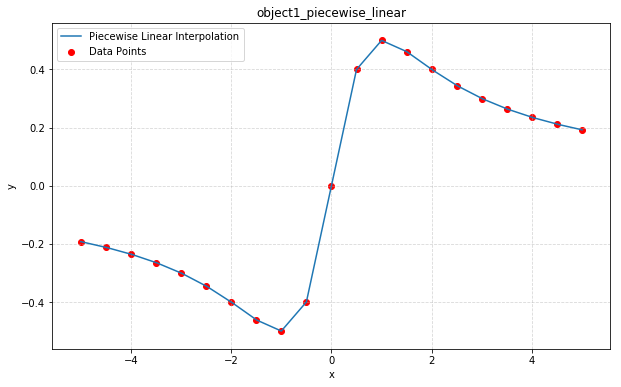

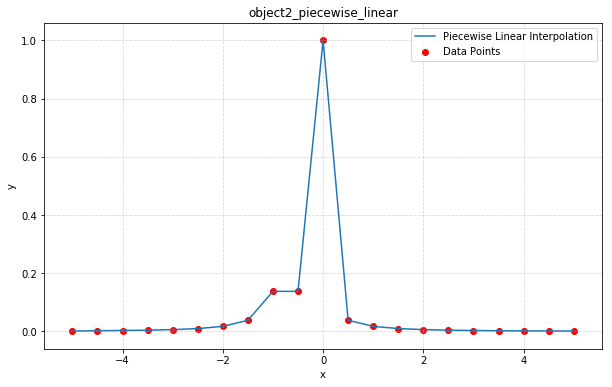

In [84]:
import numpy as np
from matplotlib import pyplot as plt

# 分段线性插值函数
def DivideLine(data, testdata):
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    if testdata in data_x:
        return data_y[data_x.index(testdata)]
    else:
        index = 0
        for j in range(len(data_x) - 1):
            if data_x[j] < testdata < data_x[j + 1]:
                index = j
                break
        predict = (testdata - data_x[index]) * (data_y[index + 1] - data_y[index]) / (data_x[index + 1] - data_x[index]) + data_y[index]
        return predict

# 画图函数
def plot(data, nums, title='分段线性插值', filename='Divline.jpg'):
    data_x = [data[i][0] for i in range(len(data))]
    data_y = [data[i][1] for i in range(len(data))]
    Area = [min(data_x), max(data_x)]
    X = [Area[0] + 1.0 * i * (Area[1] - Area[0]) / nums for i in range(nums)]
    X[-1] = Area[1]
    Y = [DivideLine(data, x) for x in X]
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='Piecewise Linear Interpolation')
    plt.scatter(data_x, data_y, color='red', label='Data Points')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.savefig(filename)
    plt.show()

# 物体1的数据
data_1 = [
    (-5.0, -0.1923), (-4.5, -0.2118), (-4.0, -0.2353), (-3.5, -0.2642), (-3.0, -0.3), 
    (-2.5, -0.3448), (-2.0, -0.4000), (-1.5, -0.4615), (-1.0, -0.5000), (-0.5, -0.4000),
    (0, 0), (0.5, 0.4000), (1.0, 0.5000), (1.5, 0.4615), (2.0, 0.4000), 
    (2.5, 0.3448), (3.0, 0.3000), (3.5, 0.2642), (4.0, 0.2353), (4.5, 0.2118), (5.0, 0.1923)
]

# 物体2的数据
data_2 = [
    (-5.0, 0.0016), (-4.5, 0.0025), (-4.0, 0.0033), (-3.5, 0.0044), (-3.0, 0.0064), 
    (-2.5, 0.0099), (-2.0, 0.0175), (-1.5, 0.0385), (-1.0, 0.1379), (-0.5, 0.1379),
    (0, 1.0000), (0.5, 0.0385), (1.0, 0.0175), (1.5, 0.0099), (2.0, 0.0064), 
    (2.5, 0.0044), (3.0, 0.0033), (3.5, 0.0025), (4.0, 0.0020), (4.5, 0.0016), (5.0, 0.0016)
]

# 估计 x = -3.75 和 0.25 位置的 y 值
x_targets = [-3.75, 0.25]
print("物体1分段线性插值结果：")
for x in x_targets:
    y = DivideLine(data_1, x)
    print(f"x = {x:.2f}, y = {y:.4f}")

print("\n物体2分段线性插值结果：")
for x in x_targets:
    y = DivideLine(data_2, x)
    print(f"x = {x:.2f}, y = {y:.6f}")

# 绘制插值图像
plot(data_1, 1000, title='object1_piecewise_linear', filename='object1_piecewise_linear.jpg')
plot(data_2, 1000, title='object2_piecewise_linear', filename='object2_piecewise_linear.jpg')